In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
df=pd.read_csv("/content/creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.duplicated().sum()

np.int64(1081)

In [11]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop(["Time"],axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
#standardizing the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["Amount"]=scaler.fit_transform(df[["Amount"]])


In [21]:
df["Class"]=df["Class"].astype(str) #converting the class column into the string for one hot encoding
df=pd.get_dummies(df,columns=["Class"]) #one hot encoding the class column

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class_0,Class_1
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,True,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,True,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,True,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,True,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,True,False


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = [col for col in df.columns if col not in ['Class_0', 'Class_1']]

# Apply scaler to the identified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("All relevant numerical features have been scaled.")
display(df.head())

All relevant numerical features have been scaled.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class_0,Class_1
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,True,False
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,True,False
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,True,False
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,True,False
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,True,False


In [44]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_data.drop(["Class_0","Class_1"],axis=1).values
y_train = train_data[["Class_0","Class_1"]].values

X_test = test_data.drop(["Class_0","Class_1"],axis=1).values
y_test = test_data[["Class_0","Class_1"]].values

print("Dataset re-split and X/y variables re-created.")

Dataset re-split and X/y variables re-created.


In [69]:
def create_autoencoder(input_shape):
  model = models.Sequential()
  # Encoders Layers
  model.add(layers.InputLayer(input_shape=(input_shape,)))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(16, activation="relu"))

  # Decoders layers
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(input_shape, activation="tanh"))
  return model

input_shape = X_train.shape[1]
autoencoder = create_autoencoder(input_shape)

# compiling the model
autoencoder.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

# train the autoencoder
print("Training autoencoder with scaled data...")
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_data=(X_test, X_test), shuffle=False)

Training autoencoder with scaled data...
Epoch 1/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.3848 - loss: 0.6151 - val_accuracy: 0.5141 - val_loss: 0.4281
Epoch 2/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5694 - loss: 0.4363 - val_accuracy: 0.5884 - val_loss: 0.3925
Epoch 3/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5889 - loss: 0.4174 - val_accuracy: 0.5782 - val_loss: 0.3930
Epoch 4/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5995 - loss: 0.4077 - val_accuracy: 0.5903 - val_loss: 0.3808
Epoch 5/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6043 - loss: 0.4016 - val_accuracy: 0.5917 - val_loss: 0.3798
Epoch 6/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6042 - loss: 0.3978 - val_accuracy: 0.5812 - val_loss: 0.3809
Epoch 7/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5991 - loss: 0.3950 - val_accuracy: 0.5700 - val_loss: 0.3774
Epoch 8/20
3547/3547 ━━━━━━━━━━━━━━━━━━━━ 

In [70]:
from sklearn.metrics import cohen_kappa_score


In [74]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

threshold = 0.6
anomalies = mse > threshold

y_true = np.argmax(y_test, axis=1)
y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
kappa_weighted = cohen_kappa_score(y_true, y_pred, weights='quadratic')

print(f'Test Accuracy: {accuracy:.4f}')
print(f"Cohen's Kappa: {kappa}")


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test Accuracy: 0.9386
Cohen's Kappa: 0.03885391016712936


In [75]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Validation Loss and Accuracy')

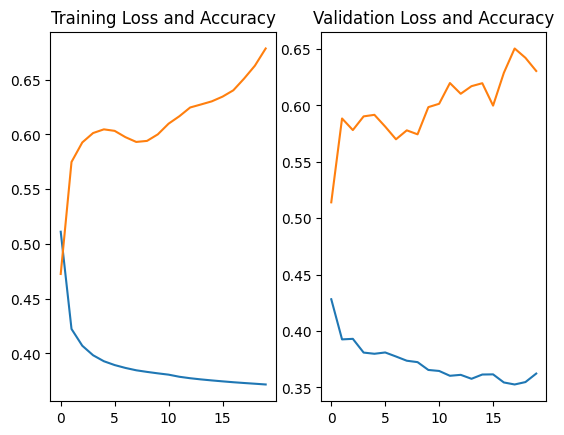

In [76]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Loss and Accuracy')

Text(0.5, 1.0, 'Anomaly Detection')

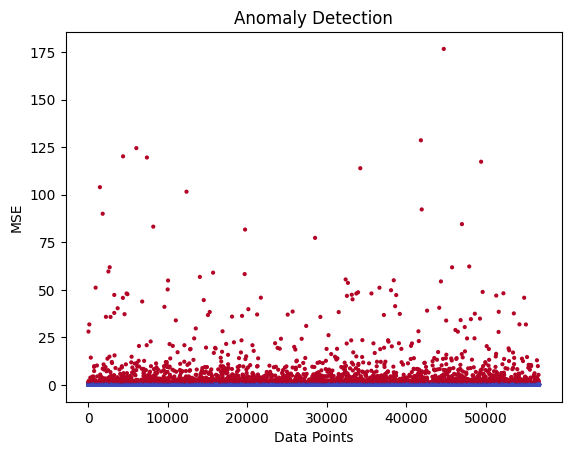

In [79]:
#anomalies in data
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='coolwarm', s=4)
plt.xlabel("Data Points")
plt.ylabel("MSE")
plt.title("Anomaly Detection")

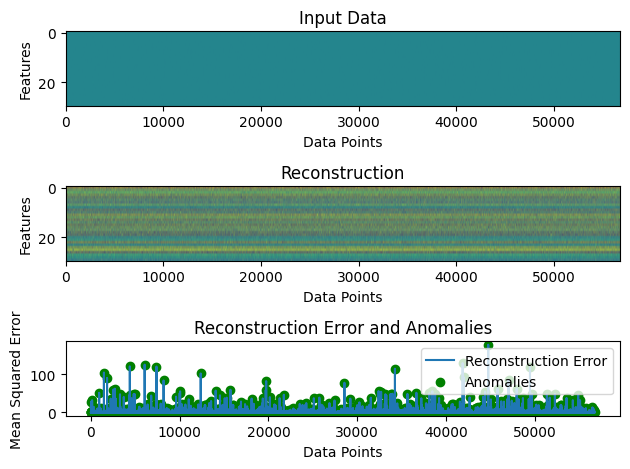

In [81]:
# Plot Input Data
plt.subplot(3, 1, 1)
plt.imshow(X_test.T, aspect='auto', cmap='viridis')
plt.title('Input Data')
plt.xlabel('Data Points')
plt.ylabel('Features')

# Plot Reconstruction
plt.subplot(3, 1, 2)
plt.imshow(predictions.T, aspect='auto', cmap='viridis')
plt.title('Reconstruction')
plt.xlabel('Data Points')
plt.ylabel('Features')

# Plot Reconstruction Error
plt.subplot(3, 1, 3)
plt.plot(mse, label='Reconstruction Error')
plt.scatter(np.where(anomalies)[0], mse[anomalies], color='green', label='Anomalies')
plt.title('Reconstruction Error and Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()

